<a href="https://colab.research.google.com/github/diegojeda/Bit-Optimization-ML/blob/master/Pruebas%20de%20Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
import pandas as pd
from scipy import stats
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno;

In [33]:
url = "https://raw.githubusercontent.com/diegojeda/Curso-Analytics---Drilling-Bits/master/Dataset/BaseLimpia.csv"

base = pd.read_csv(url,error_bad_lines=False)

In [34]:
from sklearn.metrics import r2_score , mean_squared_error

def tabla_result (modelos,X_test,y_test):
    '''
    modelos: Diccionario con los modelos a evaluar
    X_test : Matriz X con los valores de test
    y_test : Matriz y con los valores de test
    '''
    y_pred = []
    MSE = []
    MSE_lin = []
    R2 = []
    R2_lin = []
    
    for m_name,m in modelos:
        y=m.predict(X_test)
        y_pred.append(y)
        
        MSE.append(mean_squared_error(y_test,y))
        MSE_lin.append(mean_squared_error(np.exp(y_test),np.exp(y)))
        
        R2.append(r2_score(y_test,y))
        R2_lin.append(r2_score(np.exp(y_test),np.exp(y)))
        
    return (y_pred, MSE, R2, R2_lin, MSE_lin)

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Creamos las matrices para los modelos
X = base.drop('Log ROP', axis=1)
y = base[['Log ROP']]

# Dividimos los datos de manera aleatoria con el 25% para test y 75% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [36]:
ADABoo.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': 1,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estim

In [37]:

Seed = 1

dt = DecisionTreeRegressor(random_state=Seed)
ADABoo = AdaBoostRegressor(base_estimator = dt,random_state=Seed)

# Definimos el grid de evaluacion para los hyperparametros del Bagging
grid_parametros = {
    "n_estimators" : range(1, 200,10),
    "base_estimator__max_features" : range(1, 22),
    "base_estimator__max_depth" : [1,2,3,4,5],
    "base_estimator__min_samples_leaf" : [0.06,0.08,0.1,0.2,0.5],
    "learning_rate" : [0.1,0.2,0.5,0.7,0.9]
                  }

# Instanciamos el grid de busqueda, realizando un 5-folds CV
grid_AdaBoost = RandomizedSearchCV(estimator = ADABoo,
                                   n_iter = 1000,
                                   param_distributions  = grid_parametros,
                                   scoring="r2",
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   #return_train_score=True
                            )

# Ajustamos el la busqueda con los valores de train
grid_AdaBoost.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3964 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                    criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                     

In [38]:
# Extraemos los mejores hyperparametros encontrados en la busqueda
best_hyperparametros = grid_AdaBoost.best_params_
print('Mejores Hyerparametros:\n', best_hyperparametros)

# Extraemos el mejor R2 del cross-validation
best_R2 = grid_AdaBoost.best_score_
print('Mejor R2 de CV:\n', best_R2)

# Extraemos el modelos con los mejores parametros
best_AdaBoost = grid_AdaBoost.best_estimator_

# Evaluamos el mejor modelo con los datos de test
test_R2 = best_AdaBoost.score(X_test,y_test)
print("R2 de Test del Mejor Modelo: {:.3f}".format(test_R2))

# Diccionario con el modelo
modelos = [("AdaBoost",best_AdaBoost)]

# Extraemos los resultados
y_pred, MSE, R2, R2_lin, MSE_lin = tabla_result(modelos,X_test,y_test)

# Presentamos los datos en una tabla
Res = {"Modelo":["AdaBoost"],
           "MSE":MSE,
           "R2":R2}
Res = pd.DataFrame(Res)
Res.set_index("Modelo",inplace=True)
Res

Mejores Hyerparametros:
 {'n_estimators': 181, 'learning_rate': 0.9, 'base_estimator__min_samples_leaf': 0.06, 'base_estimator__max_features': 16, 'base_estimator__max_depth': 5}
Mejor R2 de CV:
 0.7382096982321447
R2 de Test del Mejor Modelo: 0.606


,MSE,R2
Modelo,,
AdaBoost,0.350856,0.605664


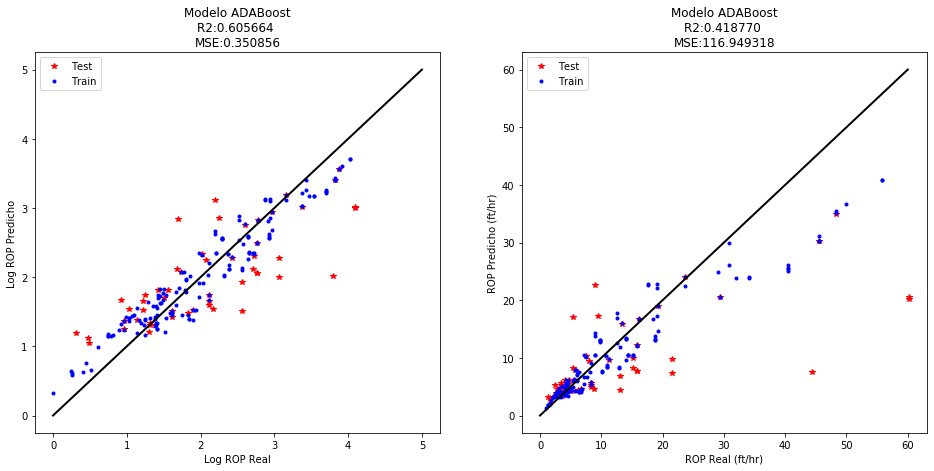

In [39]:
# Construimos los graficos de valores reales Vs valores predichos por el modelo
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(y_test,y_pred[0],linestyle="none",marker="*", color="red", label="Test")
plt.plot(y_train,best_AdaBoost.predict(X_train),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 5], [0, 5], 'k-', lw=2)
plt.xlabel("Log ROP Real")
plt.ylabel("Log ROP Predicho")
plt.title("Modelo ADABoost\nR2:%f \nMSE:%f" %(R2[0],MSE[0]))
plt.legend(loc="upper left")

plt.subplot(122)
plt.plot(np.exp(y_test),np.exp(y_pred[0]),linestyle="none",marker="*", color="red", label="Test")
plt.plot(np.exp(y_train),np.exp(best_AdaBoost.predict(X_train)),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 60], [0, 60], 'k-', lw=2)
plt.xlabel("ROP Real (ft/hr)")
plt.ylabel("ROP Predicho (ft/hr)")
plt.title("Modelo ADABoost\nR2:%f \nMSE:%f" %(R2_lin[0],MSE_lin[0]))
plt.legend(loc="upper left");

In [40]:
import xgboost as xgb

XGB_Reg = xgb.XGBRegressor(objective = "reg:linear", n_estimators = 80, seed= 123)

XGB_Reg.fit(X_train,y_train)

[20:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# Diccionario con el modelo
modelos = [("XGBOost",XGB_Reg)]

# Extraemos los resultados
y_pred, MSE, R2, R2_lin, MSE_lin = tabla_result(modelos,X_test,y_test)

# Presentamos los datos en una tabla
Res = {"Modelo":["XGBoost"],
           "MSE":MSE,
           "R2":R2}
Res = pd.DataFrame(Res)
Res.set_index("Modelo",inplace=True)
Res

,MSE,R2
Modelo,,
XGBoost,0.247706,0.721597


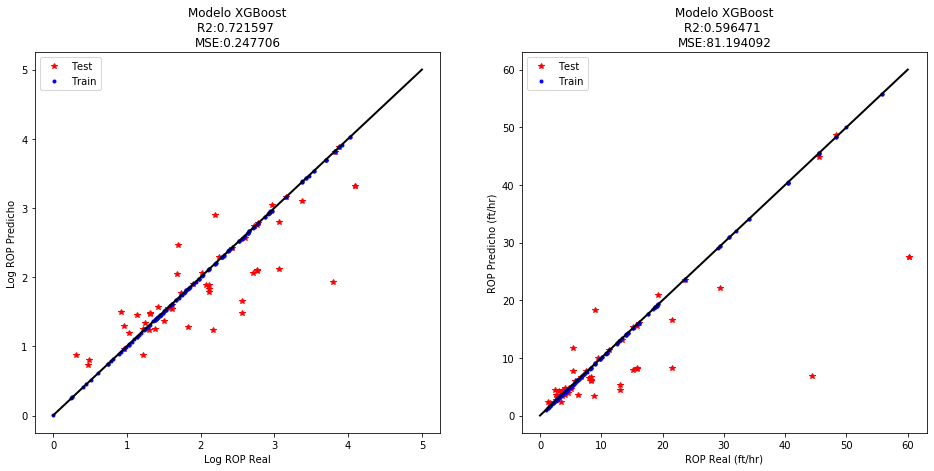

In [42]:
# Construimos los graficos de valores reales Vs valores predichos por el modelo
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(y_test,y_pred[0],linestyle="none",marker="*", color="red", label="Test")
plt.plot(y_train,XGB_Reg.predict(X_train),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 5], [0, 5], 'k-', lw=2)
plt.xlabel("Log ROP Real")
plt.ylabel("Log ROP Predicho")
plt.title("Modelo XGBoost\nR2:%f \nMSE:%f" %(R2[0],MSE[0]))
plt.legend(loc="upper left")

plt.subplot(122)
plt.plot(np.exp(y_test),np.exp(y_pred[0]),linestyle="none",marker="*", color="red", label="Test")
plt.plot(np.exp(y_train),np.exp(XGB_Reg.predict(X_train)),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 60], [0, 60], 'k-', lw=2)
plt.xlabel("ROP Real (ft/hr)")
plt.ylabel("ROP Predicho (ft/hr)")
plt.title("Modelo XGBoost\nR2:%f \nMSE:%f" %(R2_lin[0],MSE_lin[0]))
plt.legend(loc="upper left");

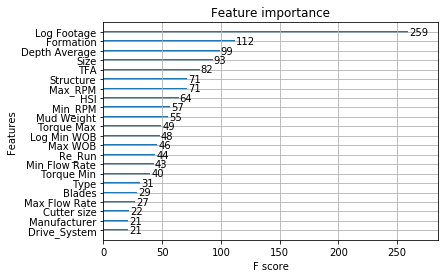

In [43]:
xgb.plot_importance(XGB_Reg)

# Tunned XGBoost

In [116]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" : [i for i in range(1,10)],
              "min_child_weight" : [i for i in range(1,20)],
              "gamma" : [i/10 for i in range(1,20)],
              "n_estimators" : [200,300,500,1000,2000,5000],
              "subsample" : [i/10 for i in range(1,10)],
              "colsample_bytree" : [i/10 for i in range(1,10)],
              "reg_alpha" : [10**i for i in range(-10,3)],
              "learning_rate" : [i/10 for i in range(1,10)]
              }

XGB_tunned = xgb.XGBRegressor()

grid_xgb = RandomizedSearchCV(estimator = XGB_tunned,
                        param_distributions = param_grid,
                        scoring="r2",
                        cv=5,
                        n_jobs=-1,
                        verbose=1,
                        n_iter=50000,
                        return_train_score=True)

grid_xgb.fit(X_train,y_train)11

print("\n\nBest parameters found: ",grid_xgb.best_params_)
print("\nHighest R2 found: ", grid_xgb.best_score_)

Fitting 5 folds for each of 50000 candidates, totalling 250000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 9832 tasks   

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_child_wei



Best parameters found:  {'subsample': 0.8, 'reg_alpha': 0.1, 'n_estimators': 2000, 'min_child_weight': 8, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.5}

Highest R2 found:  0.7836398767320477


In [117]:
# Diccionario con el modelo
modelos = [("XGBOost",grid_xgb.best_estimator_)]

# Extraemos los resultados
y_pred, MSE, R2, R2_lin, MSE_lin = tabla_result(modelos,X_test,y_test)

# Presentamos los datos en una tabla
Res = {"Modelo":["XGBoost"],
           "MSE":MSE,
           "R2":R2}
Res = pd.DataFrame(Res)
Res.set_index("Modelo",inplace=True)
Res

,MSE,R2
Modelo,,
XGBoost,0.295719,0.667634


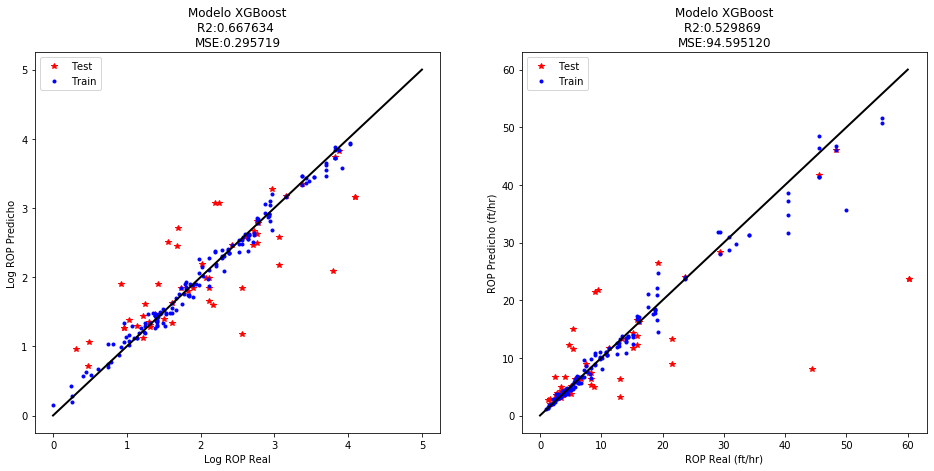

In [118]:
# Construimos los graficos de valores reales Vs valores predichos por el modelo
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(y_test,y_pred[0],linestyle="none",marker="*", color="red", label="Test")
plt.plot(y_train,grid_xgb.best_estimator_.predict(X_train),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 5], [0, 5], 'k-', lw=2)
plt.xlabel("Log ROP Real")
plt.ylabel("Log ROP Predicho")
plt.title("Modelo XGBoost\nR2:%f \nMSE:%f" %(R2[0],MSE[0]))
plt.legend(loc="upper left")

plt.subplot(122)
plt.plot(np.exp(y_test),np.exp(y_pred[0]),linestyle="none",marker="*", color="red", label="Test")
plt.plot(np.exp(y_train),np.exp(grid_xgb.best_estimator_.predict(X_train)),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 60], [0, 60], 'k-', lw=2)
plt.xlabel("ROP Real (ft/hr)")
plt.ylabel("ROP Predicho (ft/hr)")
plt.title("Modelo XGBoost\nR2:%f \nMSE:%f" %(R2_lin[0],MSE_lin[0]))
plt.legend(loc="upper left");

In [67]:
grid_xgb.best_params_

{'subsample': 0.7,
 'reg_alpha': 1e-10,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.8}

In [110]:
param_grid = {"max_depth" : [7],
              "min_child_weight" : [6],
              "gamma" : [0.2],
              "n_estimators" : [1000],
              "subsample" : [0.8],
              "colsample_bytree" : [0.8],
              "reg_alpha" : [10**i for i in range(-10,3)],
              "learning_rate" : [0.1]
              }

XGB_tunned = xgb.XGBRegressor()

grid_xgb = RandomizedSearchCV(estimator = XGB_tunned,
                        param_distributions = param_grid,
                        scoring="r2",
                        cv=5,
                        n_jobs=-1,
                        verbose=1,
                        n_iter=5000,
                        return_train_score=True)

grid_xgb.fit(X_train,y_train)

print("\n\nBest parameters found: ",grid_xgb.best_params_)
print("\nHighest R2 found: ", grid_xgb.best_score_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    4.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=5000, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8],
                                        'gamma': [0.2], 'learn



Best parameters found:  {'subsample': 0.8, 'reg_alpha': 0.001, 'n_estimators': 1000, 'min_child_weight': 6, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}

Highest R2 found:  0.7689778108635679


In [111]:
# Diccionario con el modelo
modelos = [("XGBOost",grid_xgb.best_estimator_)]

# Extraemos los resultados
y_pred, MSE, R2, R2_lin, MSE_lin = tabla_result(modelos,X_test,y_test)

# Presentamos los datos en una tabla
Res = {"Modelo":["XGBoost"],
           "MSE":MSE,
           "R2":R2}
Res = pd.DataFrame(Res)
Res.set_index("Modelo",inplace=True)
Res

,MSE,R2
Modelo,,
XGBoost,0.295013,0.668426


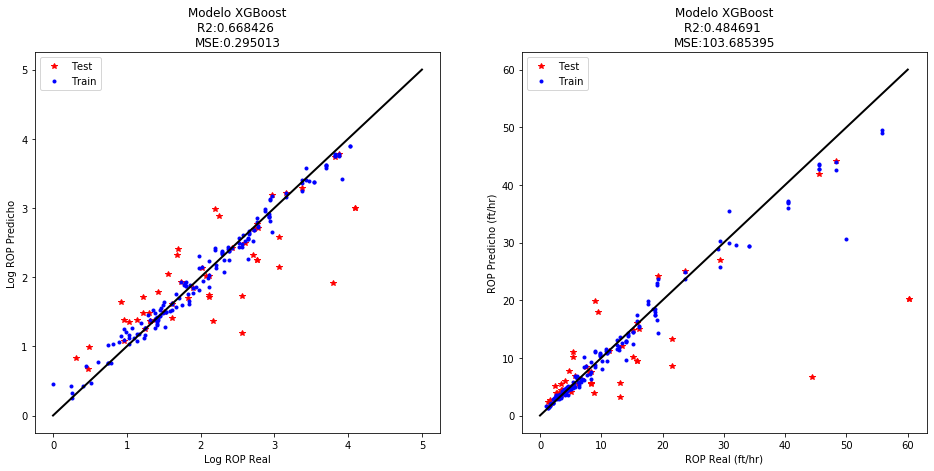

In [112]:
# Construimos los graficos de valores reales Vs valores predichos por el modelo
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(y_test,y_pred[0],linestyle="none",marker="*", color="red", label="Test")
plt.plot(y_train,grid_xgb.best_estimator_.predict(X_train),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 5], [0, 5], 'k-', lw=2)
plt.xlabel("Log ROP Real")
plt.ylabel("Log ROP Predicho")
plt.title("Modelo XGBoost\nR2:%f \nMSE:%f" %(R2[0],MSE[0]))
plt.legend(loc="upper left")

plt.subplot(122)
plt.plot(np.exp(y_test),np.exp(y_pred[0]),linestyle="none",marker="*", color="red", label="Test")
plt.plot(np.exp(y_train),np.exp(grid_xgb.best_estimator_.predict(X_train)),linestyle="none",marker=".", color="blue",label="Train")
plt.plot([0, 60], [0, 60], 'k-', lw=2)
plt.xlabel("ROP Real (ft/hr)")
plt.ylabel("ROP Predicho (ft/hr)")
plt.title("Modelo XGBoost\nR2:%f \nMSE:%f" %(R2_lin[0],MSE_lin[0]))
plt.legend(loc="upper left");